In [1]:
import pandas as pd
import numpy as np

from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
w_list = sorted(glob("competition_data/water_data/*.csv"))
w_list

rf_list = sorted(glob("competition_data/rf_data/*.csv"))
rf_list

['competition_data/rf_data\\rf_2012.csv',
 'competition_data/rf_data\\rf_2013.csv',
 'competition_data/rf_data\\rf_2014.csv',
 'competition_data/rf_data\\rf_2015.csv',
 'competition_data/rf_data\\rf_2016.csv',
 'competition_data/rf_data\\rf_2017.csv',
 'competition_data/rf_data\\rf_2018.csv',
 'competition_data/rf_data\\rf_2019.csv',
 'competition_data/rf_data\\rf_2020.csv',
 'competition_data/rf_data\\rf_2021.csv',
 'competition_data/rf_data\\rf_2022.csv']

In [3]:
pd.read_csv(w_list[0]).shape

(26496, 15)

In [32]:
wd2012 = pd.read_csv(w_list[0])

In [31]:
rf2012 = pd.read_csv(rf_list[0])

In [35]:
wd2012.dropna(axis=0)

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
0,2012-05-01 00:00,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18
1,2012-05-01 00:10,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18
2,2012-05-01 00:20,24.789,478.1,218.69,25.31,576.4,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18
3,2012-05-01 00:30,24.789,464.8,218.69,25.31,563.1,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17
4,2012-05-01 00:40,24.789,478.1,218.69,25.31,576.4,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2012-10-31 23:10,25.250,270.2,235.01,8.99,270.2,300.0,372.7,1018.67,364.2,0.0,365.0,1395.30,351.3,1837.11
26492,2012-10-31 23:20,25.250,264.1,235.01,8.99,264.1,286.0,365.7,945.75,359.2,0.0,362.0,1154.21,350.3,1814.92
26493,2012-10-31 23:30,25.250,257.9,235.01,8.99,257.9,273.0,362.7,915.35,356.2,0.0,359.0,968.58,349.3,1792.88
26494,2012-10-31 23:40,25.250,264.1,235.01,8.99,264.1,261.0,355.7,846.39,352.2,0.0,356.0,776.99,346.3,1727.56


In [9]:
all_data_2017 = pd.concat([wd2017, rf2017]).reset_index(drop = True)
all_data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13824 entries, 0 to 13823
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ymdhm        6912 non-null   object 
 1   swl          6911 non-null   float64
 2   inf          6911 non-null   float64
 3   sfw          6911 non-null   float64
 4   ecpc         6911 non-null   float64
 5   tototf       6911 non-null   float64
 6   tide_level   6703 non-null   float64
 7   wl_1018662   6854 non-null   float64
 8   fw_1018662   6060 non-null   float64
 9   wl_1018680   6854 non-null   float64
 10  fw_1018680   0 non-null      float64
 11  wl_1018683   6854 non-null   float64
 12  fw_1018683   6854 non-null   float64
 13  wl_1019630   6854 non-null   float64
 14  fw_1019630   6854 non-null   float64
 15  rf_10184100  6912 non-null   float64
 16  rf_10184110  6912 non-null   float64
 17  rf_10184140  6912 non-null   float64
dtypes: float64(17), object(1)
memory usage: 1.9+ M

In [10]:
all_data_2017['ymdhm'] = pd.to_datetime(all_data_2017['ymdhm'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


print(all_data_2017.dtypes)
print('\n-----------')

ymdhm          datetime64[ns]
swl                   float64
inf                   float64
sfw                   float64
ecpc                  float64
tototf                float64
tide_level            float64
wl_1018662            float64
fw_1018662            float64
wl_1018680            float64
fw_1018680            float64
wl_1018683            float64
fw_1018683            float64
wl_1019630            float64
fw_1019630            float64
rf_10184100           float64
rf_10184110           float64
rf_10184140           float64
dtype: object

-----------


In [11]:
all_data_2017['year'] = all_data_2017['ymdhm'].dt.year
all_data_2017['month'] = all_data_2017['ymdhm'].dt.month
all_data_2017['day'] = all_data_2017['ymdhm'].dt.day
all_data_2017['hour'] = all_data_2017['ymdhm'].dt.hour
all_data_2017['minute'] = all_data_2017['ymdhm'].dt.minute

In [12]:
all_data_2017.sample(5)

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,day,hour,minute
2511,2017-06-18 10:30:00,25.05,25.53,213.21,30.79,126.93,480.0,270.7,NaN,252.2,...,252.3,301.39,NaN,NaN,NaN,2017.0,6.0,18.0,10.0,30.0
13202,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
11465,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
6390,2017-07-15 09:00:00,25.31,835.00,222.08,21.92,627.00,642.0,351.7,808.24,331.2,...,319.3,1195.22,NaN,NaN,NaN,2017.0,7.0,15.0,9.0,0.0
12042,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [13]:
corrMat= all_data_2017[['tototf'
                  , 'wl_1018662'
                  , 'wl_1018680'
                  , 'wl_1018683'
                  , 'wl_1019630'
                  , 'rf_10184100'
                  , 'rf_10184110'
                  , 'rf_10184140']]

<AxesSubplot:>

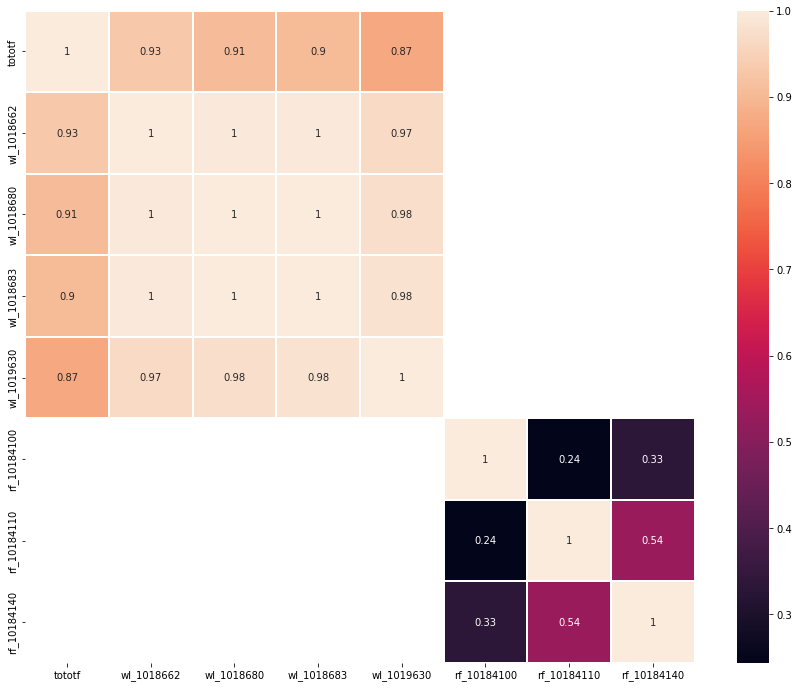

In [14]:
fig, ax =plt.subplots(figsize=(15,12))
sns.heatmap(corrMat.corr(), annot = True, ax = ax, linewidth = 0.4)

AttributeError: 'FacetGrid' object has no attribute 'set_xticks'

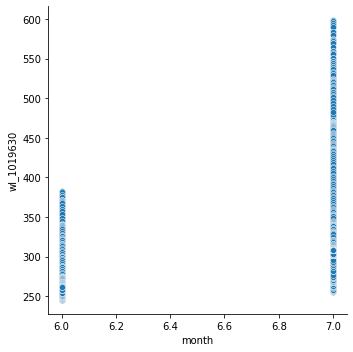

In [29]:
import seaborn as sns
g = sns.relplot(x = 'month', y = 'wl_1019630', data = all_data_2017)

g.set_xticks(range(4,11,1))
